In [250]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns


In [225]:
df = pd.read_json('logins.json')

In [226]:
print(df.head())
print(len(df.login_time.unique()))
print(len(df.login_time))

           login_time
0 1970-01-01 20:13:18
1 1970-01-01 20:16:10
2 1970-01-01 20:16:37
3 1970-01-01 20:16:36
4 1970-01-01 20:26:21
92265
93142


In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


Right away we can see that theren are some duplicate entries but out of 90,000 there is only 1,000. In this case there may be a chance that these logins are actually two at the same time but something to be aware of

In [228]:
df.describe()

<ipython-input-228-ea8415b8a3ee>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe()


,login_time
count,93142
unique,92265
top,1970-04-04 01:17:40
freq,3
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


In [229]:
df[df.duplicated(keep=False) == True]
df = df[df.duplicated() == False]
df.set_index(df.login_time, inplace=True)

In [230]:
df.sort_index(inplace=True)
df['counts'] =1
df.drop(columns = 'login_time',inplace=True)

now that we see the login times are the same to the exact second I believe there is now reason to remove them as two users logging in on the exact same time on the same machine

In [231]:
df_15 = df.resample('15min').sum()

In [232]:
df_15.head()

,counts
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [233]:
df_15.describe()

,counts
count,9788.000000
mean,9.426338
std,8.172091
min,0.000000
25%,3.000000
50%,7.000000
75%,13.000000
max,68.000000


<AxesSubplot:xlabel='login_time'>

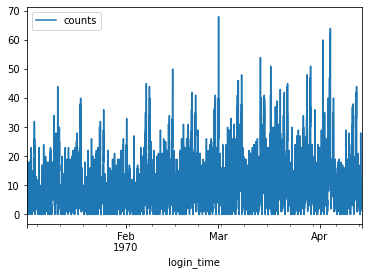

In [249]:
df_15.plot()

In [301]:
print(df_15.sort_values('counts').head(15))
print(df_15.sort_values('counts').tail(15))

                     counts  month  hour  day
login_time                                   
1970-02-03 08:15:00       0      2     8    3
1970-03-10 04:00:00       0      3     4   10
1970-01-08 05:00:00       0      1     5    8
1970-01-08 05:30:00       0      1     5    8
1970-01-08 06:00:00       0      1     6    8
1970-01-08 06:30:00       0      1     6    8
1970-02-23 05:15:00       0      2     5   23
1970-02-23 06:30:00       0      2     6   23
1970-02-23 06:45:00       0      2     6   23
1970-01-27 15:15:00       0      1    15   27
1970-02-23 08:45:00       0      2     8   23
1970-01-27 17:45:00       0      1    17   27
1970-01-27 18:00:00       0      1    18   27
1970-01-08 15:00:00       0      1    15    8
1970-01-08 15:15:00       0      1    15    8
                     counts  month  hour  day
login_time                                   
1970-02-15 04:45:00      50      2     4   15
1970-04-04 00:30:00      51      4     0    4
1970-03-17 01:30:00      51      3

In [313]:
df_15['month'] =  df_15.index.strftime('%m')
df_15['hour'] =  df_15.index.strftime('%H')
df_15['day'] =  df_15.index.strftime('%d')
df_15['month'] =  df_15['month'].astype('int64')
df_15['hour'] = df_15['hour'].astype('int64')
df_15['day'] = df_15['day'].astype('int64')
df_15['day_of_week'] =  df_15.index.day_of_week
df_15.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9788 entries, 1970-01-01 20:00:00 to 1970-04-13 18:45:00
Freq: 15T
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   counts       9788 non-null   int64
 1   month        9788 non-null   int64
 2   hour         9788 non-null   int64
 3   day          9788 non-null   int64
 4   day_of_week  9788 non-null   int64
dtypes: int64(5)
memory usage: 716.9 KB


In [285]:
df_15.groupby('day').sum().counts

day
1     3166
2     3024
3     3439
4     3973
5     3197
6     3247
7     3962
8     3981
9     2809
10    3276
11    3826
12    3578
13    2998
14    3395
15    3308
16    2198
17    3008
18    2916
19    2830
20    2866
21    3448
22    3460
23    2222
24    2292
25    2333
26    2157
27    2720
28    3506
29    2168
30    1407
31    1555
Name: counts, dtype: int64

Text(0.5, 1.0, 'users by day of month')

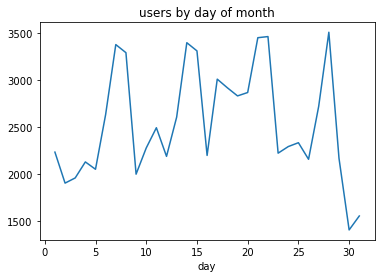

In [302]:
df_no_march  =df_15.loc[df_15.month != 4] #drop march because it doesn't have a full month

df_no_march.groupby('day').sum().counts.plot()
plt.title('users by day of month')

Text(0.5, 1.0, 'users by hour of day')

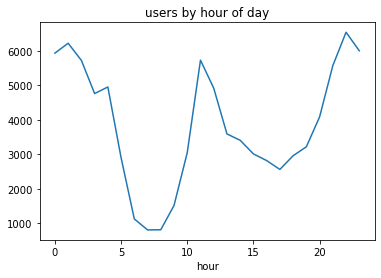

In [291]:
df_15.groupby('hour').sum().counts.plot()
plt.title('users by hour of day')

Text(0.5, 1.0, 'users by day of week')

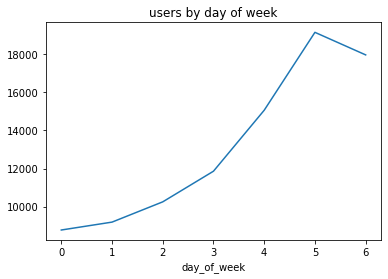

In [314]:
df_15.groupby('day_of_week').sum().counts.plot()
plt.title('users by day of week')

There is a lot to pull from the data just from the graphs shown. First off the plotting the 15 minute sum reveals that the users come on a cyclic basis and that there are certain periods of the day where people are more likely to login. From further analysis we can see that there are peaks and values throughout the month meaning that there are also specific days of the month that people are more likely to login. We also see that user sign in peak during the early or late hours of the day wiht anohter peak around lunch time. Lastly we can see that monday is the worst day for users to sign in then throughout the week the users steadily pick up peaking at saturday before a short decline on sunday